# Exercise 0

## Housing Dataset - Regression
### Source
https://www.kaggle.com/datasets/valakhorasani/tehran-house-prices-dataset
### Features
About this file
- File Name: tehran_property_prices.csv
- File Format: CSV (Comma-Separated Values)
- File Size: Approximately [insert file size here, e.g., 1.5 MB]
- Number of Rows: [insert number of rows, e.g., 1,000]
- Number of Columns: [insert number of columns, e.g., 12]
- Column Description
- Price (USD): The price of the property in US Dollars.
- Price (IRR): The price of the property in Iranian Rials.
- Area: The total area of the property in square meters.
- Room: The number of rooms in the property.
- Parking: Availability of parking (Yes/No).
- Warehouse: Availability of a warehouse (Yes/No).
- Elevator: Availability of an elevator (Yes/No).
- Address: The location of the property.
- [Additional Columns]: Include descriptions for any other columns present in your dataset.

In [3]:
import pandas as pd
from scipy.io import arff

In [4]:

# Read the CSV file
housing_df = pd.read_csv('data/TehranHouse.csv')
housing_df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [5]:
housing_df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

## Wine Reviews - Classification
### Source
https://www.openml.org/search?type=data&status=active&sort=qualities.NumberOfMissingValues&id=42074
### Features
About this file
- country
- description
- designation
- points
- price
- province
- region_1
- region_2
- variety
- winery

In [6]:
import pandas as pd
import re

file_path = 'data/wine-reviews.arff'

columns = ['country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'variety', 'winery']

with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

data_start_idx = next(i for i, line in enumerate(lines) if line.strip().lower() == '@data') + 1

data_lines = lines[data_start_idx:]

data = []

# Regular expression to handle ARFF data lines with commas and quotes correctly
pattern = re.compile(r"""('(?:\\.|[^'])*'|[^,]+)""")

for line in data_lines:
    # Split the line using the regular expression
    row = [x.strip().strip("'") for x in pattern.findall(line.strip())]
    data.append(row)

wine_df = pd.DataFrame(data, columns=columns)
wine_df.head()


,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100\% varietal wine hails from...,Martha\'s Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,?,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30\% new French oak, a...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,?,Provence red blend,Domaine de la Bégude


In [7]:
import numpy as np
wine_df['points'] = wine_df['points'].replace('?', np.nan)
wine_df['price'] = wine_df['price'].replace('?', np.nan)

wine_df['points'] = wine_df['points'].astype(float)
wine_df['price'] = wine_df['price'].astype(float)

In [8]:
wine_df.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


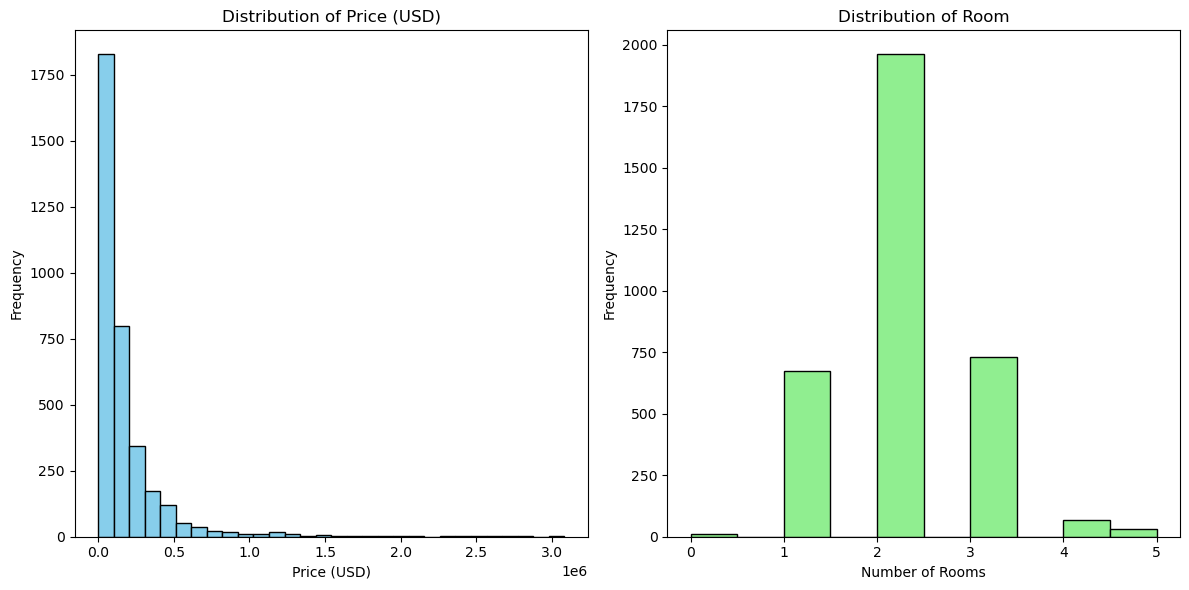

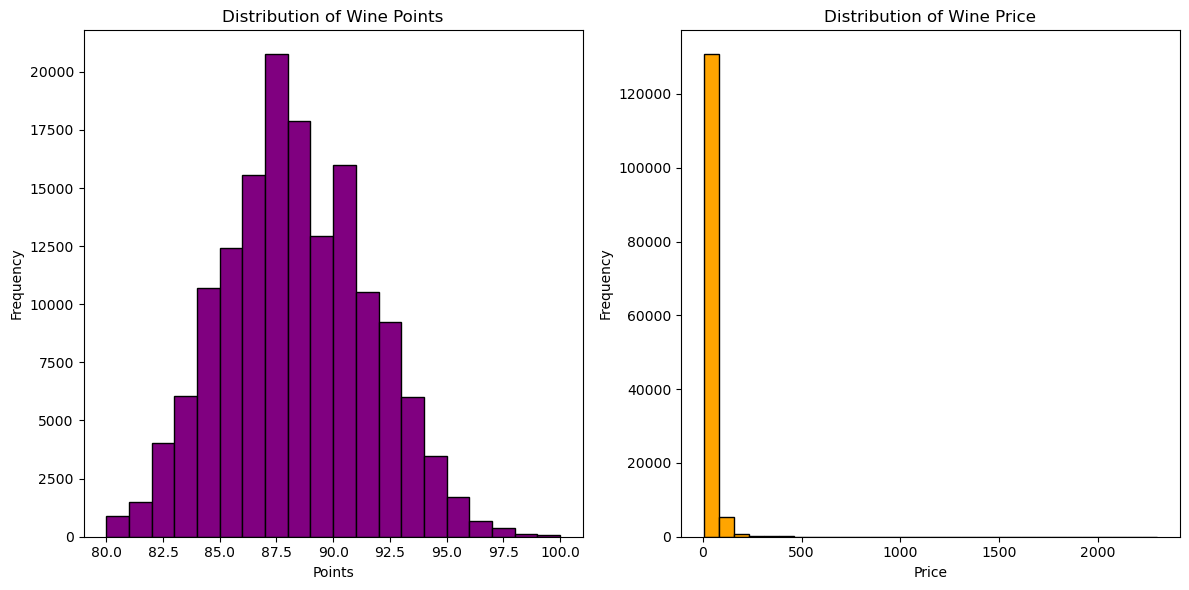

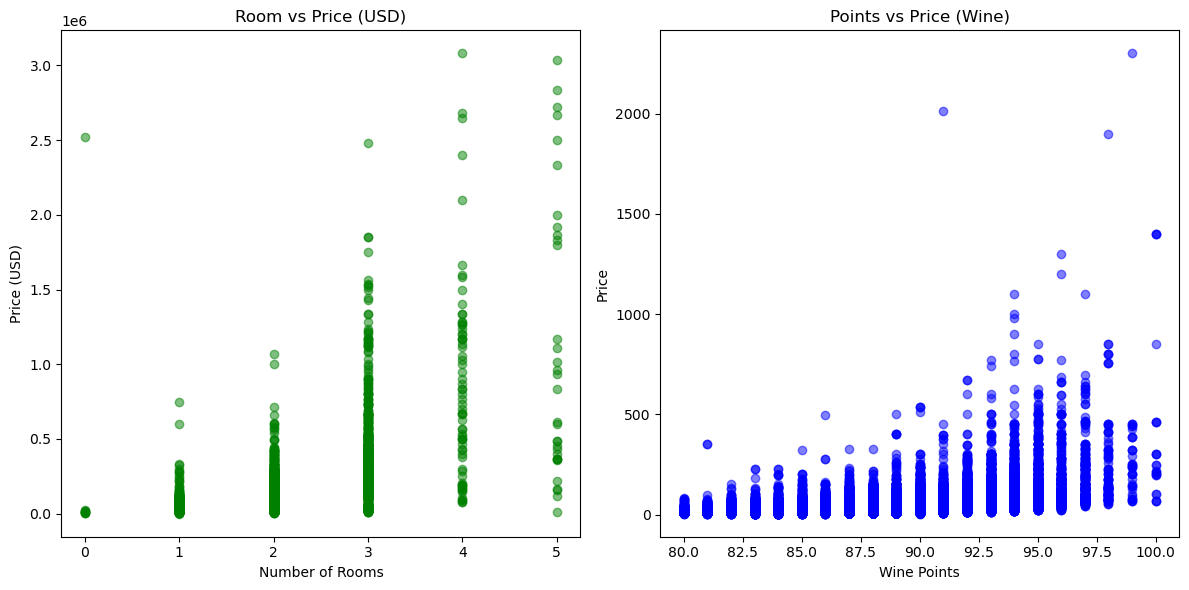

In [9]:
import matplotlib.pyplot as plt


# histograms
plt.figure(figsize=(12, 6))

# housing dataset histograms
plt.subplot(1, 2, 1)
plt.hist(housing_df['Price(USD)'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Price (USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(housing_df['Room'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Room')
plt.xlabel('Number of Rooms')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# wine dataset histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(wine_df['points'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Wine Points')
plt.xlabel('Points')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(wine_df['price'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Wine Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Scatter Plots
plt.figure(figsize=(12, 6))

# housing scatter plot
plt.subplot(1, 2, 1)
plt.scatter(housing_df['Room'], housing_df['Price(USD)'], color='green', alpha=0.5)
plt.title('Room vs Price (USD)')
plt.xlabel('Number of Rooms')
plt.ylabel('Price (USD)')

# wine scatter plot
plt.subplot(1, 2, 2)
plt.scatter(wine_df['points'], wine_df['price'], color='blue', alpha=0.5)
plt.title('Points vs Price (Wine)')
plt.xlabel('Wine Points')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

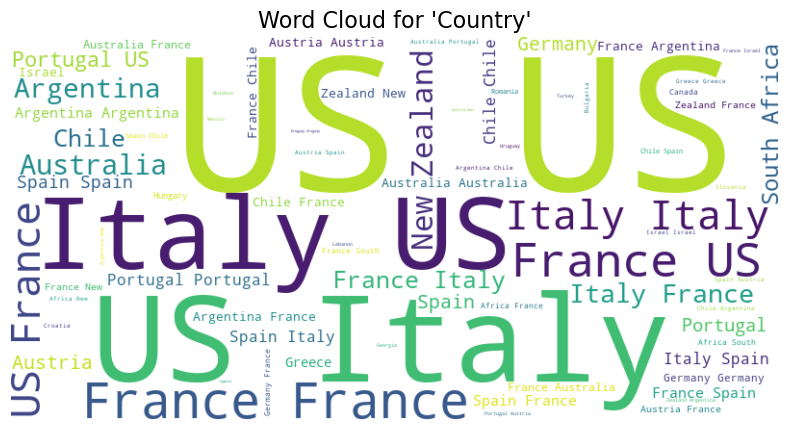

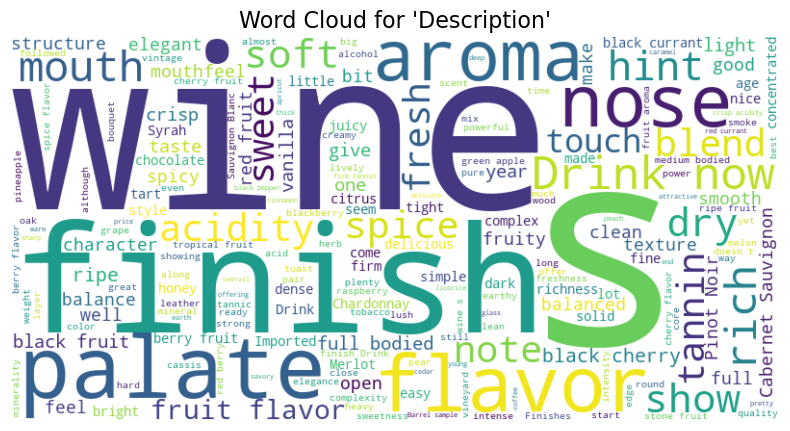

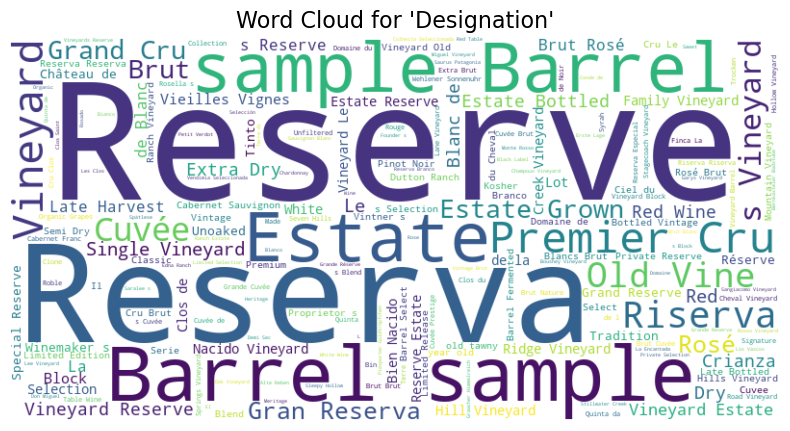

In [10]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a wine_df DataFrame with 'country', 'description', 'designation' columns
# For example:
# wine_df = pd.read_csv("your_wine_dataset.csv")

# Step 1: Create a function to generate and plot word clouds
def generate_wordcloud(column_data, title):
    # Concatenate all the text from the column to create a single string
    text = ' '.join(column_data.dropna().astype(str))  # Drop NaN and convert all to strings
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Step 2: Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Step 3: Generate word clouds for each column

# Word cloud for the 'country' column
generate_wordcloud(wine_df['country'], "Word Cloud for 'Country'")

# Word cloud for the 'description' column
generate_wordcloud(wine_df['description'], "Word Cloud for 'Description'")

# Word cloud for the 'designation' column
generate_wordcloud(wine_df['designation'], "Word Cloud for 'Designation'")
